In [1]:
#pip install yfinance

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.32.5 which is incompatible.



     -------------------------------------- 127.1/127.1 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 178.7/178.7 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 411.9/411.9 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 64.7/64.7 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 152.9/152.9 kB 1.5 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15617 sha256=06040cb32b741426f870586a75a4692907894d353faa4a0ab3c69f3f7ab5b185
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\b0\91\af\90a7590280805979d28ca2d66894f8839376e244920a0e8d4b
Successfully built multitasking
  Attempting uninstall: certifi
    Found existing installation: certifi 2022.12.7
    Uninstallin

In [12]:
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [17]:
def get_live_crypto_price(coin_id, symbol):
    url = "https://api.coingecko.com/api/v3/simple/price"
    
    params = {
        "ids": coin_id,
        "vs_currencies": "usd"
    }
    
    response = requests.get(url, params=params, verify=False)
    data = response.json()
    
    return {
        "date": datetime.now(),
        "crypto": symbol,
        "forecast_price": data[coin_id]["usd"],
        "model": "LIVE"
    }


In [9]:
coins = {
    "bitcoin": "BTC",
    "ethereum": "ETH"
}

live_data = []

for coin_id, symbol in coins.items():
    live_data.append(get_live_crypto_price(coin_id, symbol))

live_df = pd.DataFrame(live_data)
live_df



C:\Users\HP\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.coingecko.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.coingecko.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


,date,crypto,forecast_price,model
0,2026-01-24 12:23:33.398536,BTC,89513.0,LIVE
1,2026-01-24 12:23:33.526352,ETH,2958.0,LIVE


In [10]:
live_df.to_csv("live_crypto_data.csv", index=False)

In [19]:
print(live_df.columns)

Index(['date', 'crypto', 'forecast_price', 'model'], dtype='object')


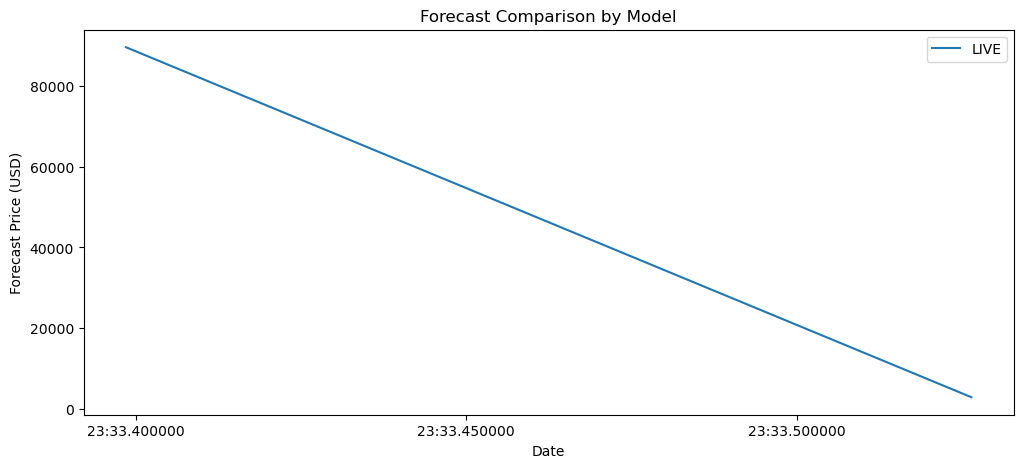

In [21]:
# ---------- MODEL-WISE FORECAST PLOT ----------

plt.figure(figsize=(12,5))
for model in forecast_df['model'].unique():
    subset = forecast_df[forecast_df['model'] == model]
    plt.plot(subset['date'], subset['forecast_price'], label=model)

plt.xlabel("Date")
plt.ylabel("Forecast Price (USD)")
plt.title("Forecast Comparison by Model")
plt.legend()
plt.show()


In [23]:
print(forecast_df.head())
print(forecast_df.info())
print(forecast_df['crypto'].unique())

                        date crypto  forecast_price model
0 2026-01-24 12:23:33.398536    BTC         89513.0  LIVE
1 2026-01-24 12:23:33.526352    ETH          2958.0  LIVE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2 non-null      datetime64[ns]
 1   crypto          2 non-null      object        
 2   forecast_price  2 non-null      float64       
 3   model           2 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 192.0+ bytes
None
['BTC' 'ETH']
